In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON files
file1_path ='flexible_cot_transfer_result_prob_mean.json' #'flexible_cot_transfer_result_direct_vote.json'
file2_path = 'outputs_openai/All_results.json'

with open(file1_path, 'r') as file1:
    data1 = json.load(file1)

with open(file2_path, 'r') as file2:
    data2 = json.load(file2)

# Convert data to DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df1_means = df1.groupby('Benchmark')[['transfer_pred_token_use']].mean().reset_index()
df2_means = df2.groupby('Benchmark')[['CoT_mean_tokens']].mean().reset_index()

# Merge means on Benchmark
merged_means = pd.merge(df1_means, df2_means, on='Benchmark', how='inner')


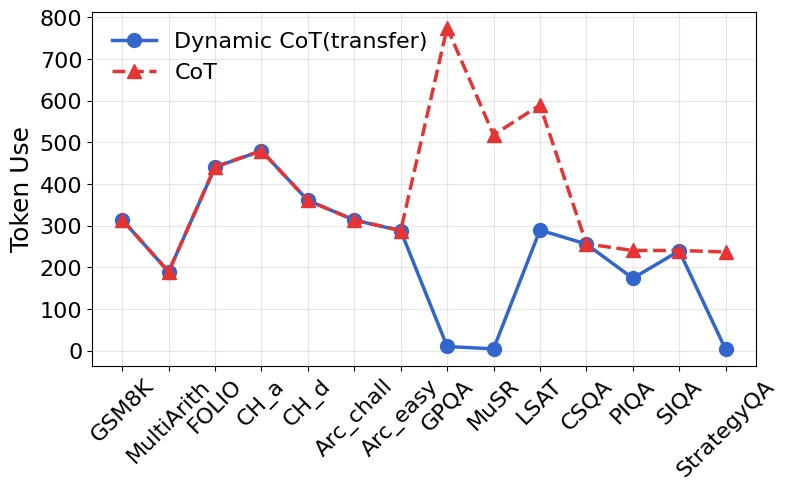

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

benchmark_order = [
    "gsm8k", "MultiArith",  "FOLIO", "ContextHub_abductive", 
    "ContextHub_deductive", "arc_challenge", "arc_easy","gpqa", "MuSR", 
    "lsat", "commensenseqa", "piqa", "siqa", "strategyqa"
]
custom_xticks = [
    "GSM8K", "MultiArith", "FOLIO", "CH_a", "CH_d", 
    "Arc_chall", "Arc_easy","GPQA",  "MuSR", "LSAT", 
    "CSQA", "PIQA", "SIQA", "StrategyQA"
]
# Reorder the merged DataFrame according to the benchmark order
merged_means['Benchmark'] = pd.Categorical(merged_means['Benchmark'], categories=benchmark_order, ordered=True)
merged_means = merged_means.sort_values('Benchmark')

color1 = (0.9, 0.2, 0.2)  
color2 = (0.2, 0.4, 0.8)  
color3 = (0.1, 0.5, 0.2)


benchmarks = merged_means['Benchmark']
x = range(len(benchmarks))
# mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.grid'] = True  # Light grid for readability
mpl.rcParams['grid.alpha'] = 0.3  # Slightly transparent grid
mpl.rcParams['legend.frameon'] = False  # No box around legend

plt.figure(figsize=(8, 5))  # Optimal size for ICML two-column format

# Plot lines with improved markers and line styles
plt.plot(x, merged_means['transfer_pred_token_use'], 
         marker='o', markersize=10, linestyle='-', linewidth=2.5, 
         label='Dynamic CoT(transfer)', color=color2)

plt.plot(x, merged_means['CoT_mean_tokens'], 
         marker='^', markersize=10, linestyle='--', linewidth=2.5, 
         label='CoT', color=color1)

# Customize ticks
plt.xticks(x, custom_xticks, rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Labels
plt.ylabel('Token Use', fontsize=18)
# plt.xlabel('Your X-axis Label', fontsize=18)  # Add xlabel if needed

# Adjust legend
plt.legend(fontsize=16, loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Save with proper DPI for print quality
plt.savefig('token_use_figure_transfer.pdf', format='pdf', dpi=300)

plt.show()
